In [70]:
import pandas as pd

In [71]:
titles_df = pd.read_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\clean-data\title_clean.csv")

In [72]:
titles_df.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon


In [73]:
genre_list = []

for genre in titles_df.genres:
    genre_names = genre.split(",")
    for genre_name in genre_names:
        genre_name = genre_name.strip(" ['']")
        if genre_name not in genre_list:
            genre_list.append(genre_name)

genre_list

['comedy',
 'family',
 'animation',
 'action',
 'fantasy',
 'horror',
 'drama',
 'war',
 'western',
 'european',
 'romance',
 'thriller',
 'crime',
 'history',
 'sport',
 'scifi',
 'documentation',
 '',
 'music',
 'reality']

In [74]:
show_genres_count = []

for genre in titles_df.genres:
    genre_names = genre.split(",")
    for genre_name in genre_names:
        genre_name = genre_name.strip(" ['']")
        show_genres_count.append(genre_name)

genre_count = {}

for i in genre_list:
    count = show_genres_count.count(i)
    genre_count[i] = count

genre_series = pd.Series(genre_count)

genre_series.sort_values(ascending=False)

drama            11598
comedy            8925
thriller          4981
action            4794
romance           4281
documentation     3856
crime             3404
family            2985
scifi             2652
animation         2587
fantasy           2561
horror            2210
european          1834
music             1163
history           1079
western            866
reality            808
war                770
sport              694
                   376
dtype: int64

In [75]:
titles_df.columns

Index(['Unnamed: 0', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'service'],
      dtype='object')

In [76]:
genres_df = titles_df[['id','title','genres']].copy()

In [77]:
genres_df.head()

,id,title,genres
0,ts20945,The Three Stooges,"['comedy', 'family', 'animation', 'action', 'f..."
1,tm19248,The General,"['action', 'drama', 'war', 'western', 'comedy'..."
2,tm82253,The Best Years of Our Lives,"['romance', 'war', 'drama']"
3,tm83884,His Girl Friday,"['comedy', 'drama', 'romance']"
4,tm56584,In a Lonely Place,"['thriller', 'drama', 'romance']"


In [78]:
genres_df.drop_duplicates(inplace=True)


In [79]:
genres_df['genres'] = [x.strip("['']").split(',') for x in genres_df['genres']]

In [80]:
type(genres_df.genres[0])

list

In [81]:
genres_df = genres_df.explode('genres')

In [82]:
genres_df['genres'] = genres_df['genres'].str.replace("'","").str.strip()

In [83]:
genres_df

,id,title,genres
0,ts20945,The Three Stooges,comedy
0,ts20945,The Three Stooges,family
0,ts20945,The Three Stooges,animation
0,ts20945,The Three Stooges,action
0,ts20945,The Three Stooges,fantasy
...,...,...,...
25440,ts305329,House Calls with Dr. Phil,reality
25441,ts291097,Disrupt & Dismantle with Soledad O'Brien,documentation
25442,tm1100359,Race Against Time: The CIA and 9/11,documentation
25443,tm1097570,Virus Hunting: Cave to COVID,


In [84]:
genres_df.genres.value_counts()

drama            10501
comedy            8091
thriller          4459
action            4267
romance           3742
documentation     3719
crime             3058
family            2744
animation         2413
scifi             2389
fantasy           2342
horror            1952
european          1717
music             1038
history           1005
reality            759
war                673
western            649
sport              641
                   368
Name: genres, dtype: int64

In [85]:
genres_df = genres_df[genres_df.genres != ""]

In [86]:
genres_df.genres.value_counts()

drama            10501
comedy            8091
thriller          4459
action            4267
romance           3742
documentation     3719
crime             3058
family            2744
animation         2413
scifi             2389
fantasy           2342
horror            1952
european          1717
music             1038
history           1005
reality            759
war                673
western            649
sport              641
Name: genres, dtype: int64

In [87]:
genres_df.to_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\clean-data\genres.csv")

In [88]:
genres_df.head()

,id,title,genres
0,ts20945,The Three Stooges,comedy
0,ts20945,The Three Stooges,family
0,ts20945,The Three Stooges,animation
0,ts20945,The Three Stooges,action
0,ts20945,The Three Stooges,fantasy


In [89]:
titles_df.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon


In [90]:
df = genres_df.merge(titles_df, on="id", suffixes= ("", "_2"))

In [91]:
df[["id", "title", "genres", "imdb_score", "imdb_votes"]].head()

,id,title,genres,imdb_score,imdb_votes
0,ts20945,The Three Stooges,comedy,8.6,1092.0
1,ts20945,The Three Stooges,family,8.6,1092.0
2,ts20945,The Three Stooges,animation,8.6,1092.0
3,ts20945,The Three Stooges,action,8.6,1092.0
4,ts20945,The Three Stooges,fantasy,8.6,1092.0


In [92]:
df = df[["id", "title", "genres", "imdb_score", "imdb_votes"]]

<AxesSubplot:>

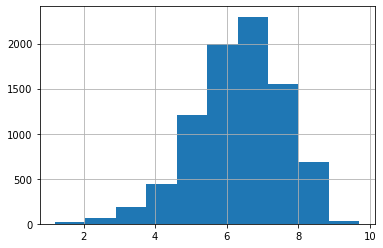

In [93]:
df[df.genres == "comedy"].imdb_score.hist()

In [94]:
import seaborn as sns

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

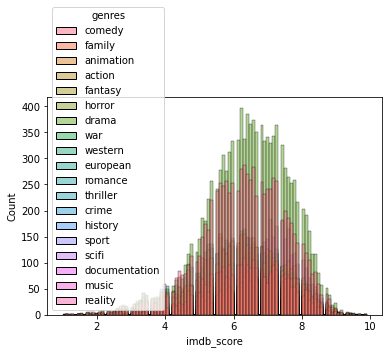

In [95]:
sns.histplot(data=df, x="imdb_score", hue="genres")

<AxesSubplot:xlabel='imdb_score', ylabel='genres'>

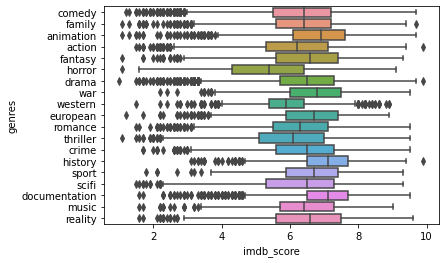

In [96]:
sns.boxplot(data=df, x="imdb_score", y="genres")

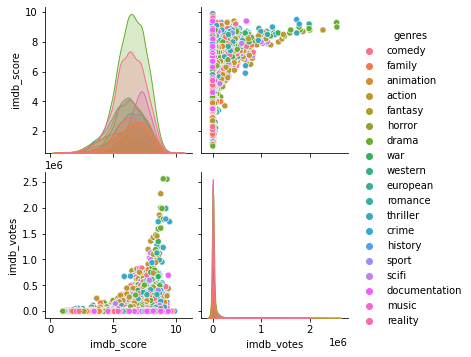

In [97]:
sns.pairplot(data=df, hue="genres")

In [98]:
corr = df[["genres", "imdb_score"]].corr()

In [99]:
corr

,imdb_score
imdb_score,1.0


In [100]:
df_dummies = pd.get_dummies(df['genres'])
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['genres']

In [101]:
df_new

,id,title,imdb_score,imdb_votes,action,animation,comedy,crime,documentation,drama,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,ts20945,The Three Stooges,8.6,1092.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ts20945,The Three Stooges,8.6,1092.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ts20945,The Three Stooges,8.6,1092.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ts20945,The Three Stooges,8.6,1092.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ts20945,The Three Stooges,8.6,1092.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62100,ts310234,Age of Humans,NaN,NaN,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62101,ts305329,House Calls with Dr. Phil,5.4,35.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62102,ts291097,Disrupt & Dismantle with Soledad O'Brien,3.5,18.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62103,tm1100359,Race Against Time: The CIA and 9/11,4.6,64.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_new.columns

Index(['id', 'title', 'imdb_score', 'imdb_votes', 'action', 'animation',
       'comedy', 'crime', 'documentation', 'drama', 'european', 'family',
       'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi',
       'sport', 'thriller', 'war', 'western'],
      dtype='object')

In [103]:
x = df_new[['imdb_score', 'action', 'animation',
       'comedy', 'crime', 'documentation', 'drama', 'european', 'family',
       'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi',
       'sport', 'thriller', 'war', 'western']].values

In [104]:
import numpy as np
correlation_matrix = np.corrcoef(x.T)

In [105]:
df_new2 = df_new[['imdb_score', 'action', 'animation',
       'comedy', 'crime', 'documentation', 'drama', 'european', 'family',
       'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi',
       'sport', 'thriller', 'war', 'western']]

<AxesSubplot:>

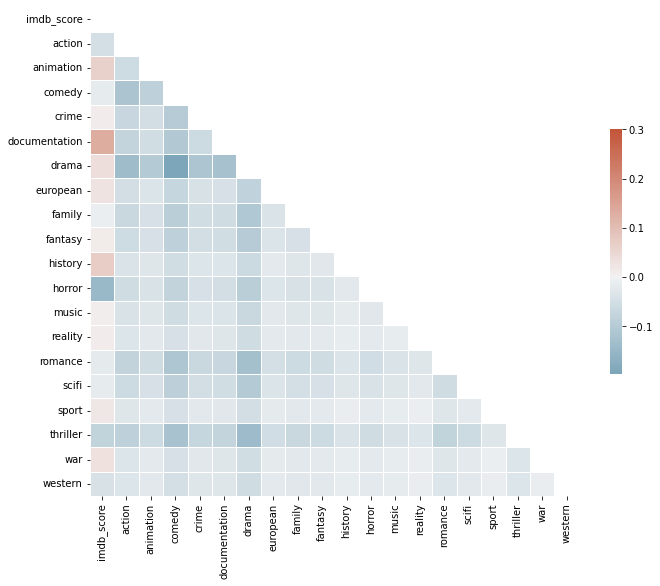

In [106]:
import matplotlib.pyplot as plt
corr = df_new2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [107]:
titles_df['genres'] = [x.strip("['']").split(',') for x in titles_df['genres']]

In [108]:
type(titles_df.genres[1])

list

In [117]:
result = titles_df.genres.sort_values().apply(lambda x: sorted([genre.replace("'", "").strip() for genre in x]))
result = pd.DataFrame(result).reset_index(drop=True)

In [118]:
result

,genres
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
25440,"[war, western]"
25441,"[war, western]"
25442,"[drama, history, romance, war, western]"
25443,"[drama, history, romance, war, western]"


In [119]:
result.genres.astype(str).value_counts()

['documentation']                                                          1784
['comedy']                                                                 1748
['drama']                                                                  1638
['comedy', 'drama']                                                         840
['comedy', 'drama', 'romance']                                              672
                                                                           ... 
['action', 'drama', 'fantasy', 'scifi', 'thriller', 'western']                1
['action', 'comedy', 'drama', 'romance', 'war']                               1
['drama', 'history', 'music', 'romance', 'war']                               1
['action', 'animation', 'drama', 'romance', 'scifi', 'thriller', 'war']       1
['romance', 'war', 'western']                                                 1
Name: genres, Length: 1940, dtype: int64

In [138]:
genre_sort_order = genre_series.sort_values(ascending=True)
genre_sort_order = list(genre_sort_order.index)
genre_sort_order.remove("")
genre_sort_order = genre_sort_order + [""]
genre_sort_order

['sport',
 'war',
 'reality',
 'western',
 'history',
 'music',
 'european',
 'horror',
 'fantasy',
 'animation',
 'scifi',
 'family',
 'crime',
 'documentation',
 'romance',
 'action',
 'thriller',
 'comedy',
 'drama',
 '']

In [157]:
results_by_genre_popularity = titles_df.genres.apply(lambda x: sorted([genre.replace("'", "")\
    .strip() for genre in x], key=genre_sort_order.index))
results_by_genre_popularity = pd.DataFrame(results_by_genre_popularity).reset_index(drop=True)

In [158]:
results_by_genre_popularity.genres.apply(lambda x: x[:2]).astype(str).value_counts().tail(100)

['sport', 'comedy']             57
['reality', 'comedy']           55
['crime']                       55
['music', 'animation']          54
['animation', 'romance']        54
                                ..
['european']                     3
['reality', 'western']           2
['reality', 'thriller']          2
['sport', 'horror']              2
['fantasy', 'documentation']     1
Name: genres, Length: 100, dtype: int64

In [159]:
titles_df["genres_sorted"] = results_by_genre_popularity

In [166]:
titles_df["representative_genres"] = titles_df.genres_sorted.apply(lambda x: "_".join(x[:3]))

In [169]:
titles_df[["title", "genres", "genres_sorted", "representative_genres"]].head(50)

,title,genres,genres_sorted,representative_genres
0,The Three Stooges,"[comedy', 'family', 'animation', 'action', ...","[horror, fantasy, animation, family, action, c...",horror_fantasy_animation
1,The General,"[action', 'drama', 'war', 'western', 'come...","[war, western, european, action, comedy, drama]",war_western_european
2,The Best Years of Our Lives,"[romance', 'war', 'drama]","[war, romance, drama]",war_romance_drama
3,His Girl Friday,"[comedy', 'drama', 'romance]","[romance, comedy, drama]",romance_comedy_drama
4,In a Lonely Place,"[thriller', 'drama', 'romance]","[romance, thriller, drama]",romance_thriller_drama
5,Stagecoach,"[western', 'drama]","[western, drama]",western_drama
6,It's a Wonderful Life,"[drama', 'family', 'fantasy', 'romance', '...","[fantasy, family, romance, comedy, drama]",fantasy_family_romance
7,Detour,"[thriller', 'drama', 'crime]","[crime, thriller, drama]",crime_thriller_drama
8,My Man Godfrey,"[comedy', 'romance', 'drama]","[romance, comedy, drama]",romance_comedy_drama
9,Marihuana,"[crime', 'drama]","[crime, drama]",crime_drama
